In [1]:
import math
import pyclesperanto_prototype as cle
from pyclesperanto_prototype._tier8._affine_transform import _determine_translation_and_bounding_box
from skimage.io import imread

voxel_size_x_in_microns = 0.1449922
voxel_size_y_in_microns = 0.1449922
voxel_size_z_in_microns = 0.3

deskewing_angle_in_degrees = 30

original_image = imread('../../data/RBC_tiny.tif')
original_image = original_image[::4]
voxel_size_z_in_microns = voxel_size_z_in_microns * 4

#Defining Deskewing
scale_factor = 1 #Scale factor is used in clesperanto if we want to scale the images in case they don't fit in memory

#initialise a transform
deskew_transform =cle.AffineTransform3D()
#Shear
shear_factor = math.sin((90 - deskewing_angle_in_degrees) * math.pi / 180.0) * (voxel_size_z_in_microns/voxel_size_y_in_microns)
deskew_transform._matrix[1, 2] = shear_factor
#Scale
new_dz = math.sin(deskewing_angle_in_degrees * math.pi / 180.0) * voxel_size_z_in_microns
scale_factor_z = (new_dz / voxel_size_y_in_microns) * scale_factor
deskew_transform.scale(scale_x=scale_factor, scale_y=scale_factor, scale_z=scale_factor_z)
#Rotate deskewing angle
deskew_transform.rotate(angle_in_degrees = 0 - deskewing_angle_in_degrees, axis=0)

_,deskew_transform,translation = _determine_translation_and_bounding_box(original_image, deskew_transform)

deskew_transform._matrix


#deskewed = cle.affine_transform(source= original_image,transform = deskew_transform,auto_size=True)#,linear_interpolation=True)
#print(deskewed.shape)

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  8.66025404e-01,  8.27630728e+00,
         0.00000000e+00],
       [ 0.00000000e+00, -5.00000000e-01,  2.23480946e-16,
         5.90000000e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [2]:
translation

array([-0., -0., 59.])

In [7]:
shear_transform =cle.AffineTransform3D()
#Shear
shear_factor = math.sin((90 - deskewing_angle_in_degrees) * math.pi / 180.0) * (voxel_size_z_in_microns/voxel_size_y_in_microns)
shear_transform._matrix[1, 2] = shear_factor

trans_rotate_mat = cle.AffineTransform3D()
new_dz = math.sin(deskewing_angle_in_degrees * math.pi / 180.0) * voxel_size_z_in_microns
scale_factor_z = (new_dz / voxel_size_y_in_microns) * scale_factor
trans_rotate_mat.scale(scale_x=scale_factor, scale_y=scale_factor, scale_z=scale_factor_z)
#Rotate deskewing angle
trans_rotate_mat.rotate(angle_in_degrees = 0 - deskewing_angle_in_degrees, axis=0)


transform_z = cle.AffineTransform3D()
transform_z.translate(translate_z=1/voxel_size_z_in_microns)
#transform_z.concatenate(shear_transform_inverse)

transform_y = cle.AffineTransform3D()
transform_y.translate(translate_y=1/voxel_size_y_in_microns)#
#transform_y._pre_concatenate(shear_transform_inverse)

transform_x = cle.AffineTransform3D()
transform_x.translate(translate_x=1/voxel_size_x_in_microns)#
#transform_x._pre_concatenate(shear_transform_inverse)

#deskewed_test = cle.affine_transform(source= original_image,
                                            #transform = deskew_transform,
                                           #auto_size=True)#,linear_interpolation=True)
#print(deskewed_test.shape)

In [4]:
import numpy as np
deskewed_test = np.asarray(deskewed_test)
deskewed_test.max()

NameError: name 'deskewed_test' is not defined

In [5]:
transform_y._matrix

array([[1., 0., 0., 0.],
       [0., 1., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [12]:
import numpy as np 
deskewed_test_affine = cle.affine_transform_deskew(source= original_image,
                                            transform = deskew_transform,
                                           auto_size=True,
                                            shear_transform=shear_transform,
                                            translatez = transform_z,
                                            translatey = transform_y,
                                            translatex = transform_x,
                                            linear_interpolation=True)
import napari 
viewer = napari.Viewer() 
deskewed_test_affine = np.asarray(deskewed_test_affine)
viewer.add_image(deskewed_test_affine)

<Image layer 'deskewed_test_affine' at 0x29d9e450d00>

In [15]:
deskewed_test_affine.shape

(59, 1832, 209)

In [8]:
print(deskewed_test_affine.shape)
import numpy as np
deskewed_test_affine = np.asarray(deskewed_test_affine)
deskewed_test_affine.max()

(59, 1832, 209)


255.0

In [9]:
import numpy as np

import napari 
viewer = napari.Viewer() 
viewer.add_image(deskewed_test_affine)

<Image layer 'deskewed_test_affine' at 0x12a9eda93a0>

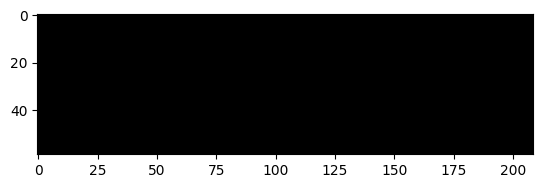

In [21]:
cle.imshow(deskewed_test_affine[:,200])

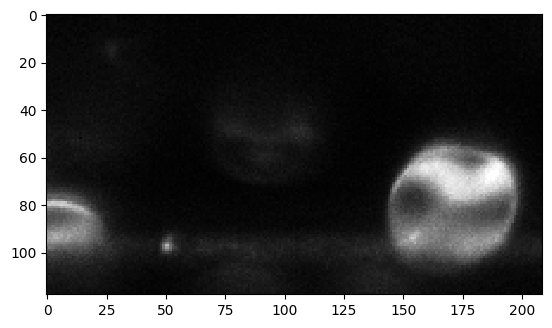

In [6]:
cle.imshow(original_image[150,:,:])